# 01. Korean Dramas from 2015-2023 with Actors & Reviews (from Kaggle)
- korean_drama.csv: 1752 Korean drama to be explored
- recommendations.csv: table contains the recommendation given to different drama. The recommendation is a product of the MyDramaList community.
- review.csv: review given to the drama from users on the website
- wiki_actor.csv: information regarding the actors (mainly the drama they were part of and their role)

    - 17 columns
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import missingno as msno

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import koreanize_matplotlib


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# df_kdrama = pd.read_csv("../data/korean_drama.csv")
# df_kdrama.head()

In [3]:
# df = df_kdrama.sort_values(['rank'])
# df.head()

In [4]:
# df_recommend = pd.read_csv("../data/recommendations.csv")
# df_recommend.info()

In [5]:
# df_reviews = pd.read_csv("../data/reviews.csv")
# df_reviews.head()

In [6]:
# wiki_actors = pd.read_csv("../data/wiki_actors.csv")
# wiki_actors.head()

#### df_kdrama 요약 확인
- null값 있는 rows 확인 필요 (columns: director(716), screenwriter(793), duration(24), aired_on(232), org_net(408), synopsis(168))

In [7]:
# df_kdrama.info()

In [8]:
# df_kdrama.describe()

#### org_net 컬럼명에 맞지 않게 제작사가 아닌 스트리밍 서비스도 섞여있다
- unique network total = 42

In [9]:
# df_kdrama['org_net'].unique()

In [10]:
# df_networks = pd.read_csv("../data/unique_network.csv")
# df_networks

#### MyDramaList에서 부가정보 크롤링시 오류 검출 위해 rank, pop 순으로 sort

In [11]:
# ranking = df_kdrama[['rank', 'pop','drama_name']]
# sorted = ranking.sort_values(['rank', 'pop'],
#                             ascending = [True, True])
# sorted[150:200]

In [12]:
# sorted.to_csv('/home/rae/dev_ws/project_EDA/top_100_kdramas/rank_sorted_test.csv')
# sorted.to_csv('../data/rank_sorted_test_.csv')

In [13]:
# drama_df_in_rank = df_kdrama.loc[df_kdrama['rank']<=10000]
# drama_df_in_rank

In [14]:
# drama_df_in_rank.to_excel('../data/top_10000_drama.xlsx')

In [15]:
# df_kdrama.loc[df_kdrama['drama_name'] == 'Twenty Again']

In [16]:
# msno.matrix(df_kdrama);

# 02. 추가 데이터 (kor_name, genre, watchers) 합쳐진 xlsx 불러오기

In [17]:
# df_kdrama_02 = pd.read_excel("../data/drama_df_in_rank_2023-09-11_ver_3.xlsx")
# df_kdrama_02.info()

#### null값 분석
- synopsis MyDramaList에서 제공 안되어 있는 드라마: 4건
- 현재 파일 director 정보 없는 드라마: 247건
- 현재 파일 screenwriter 정보 없는 드라마: 290건
- 현재 파일 aired_on 정보 없는 드라마: 62건
- 현재 파일 org_net 정보 없는 드라마: 129건

# 03. MyDramaList에서 crawling해온 데이터 불러오기 

In [18]:
# # libraries 코드를 import 시키기 위한 코드
# import sys
# sys.path.append("../libraries/")

# from libraries.aws_to_df import aws_to_df
# df = aws_to_df()

In [19]:
drama_df = pd.read_excel("../data/drama_df_in_rank_2023-09-14_ver_7.xlsx")
# drama_df.info()

## df_mydramalist NaN값 확인

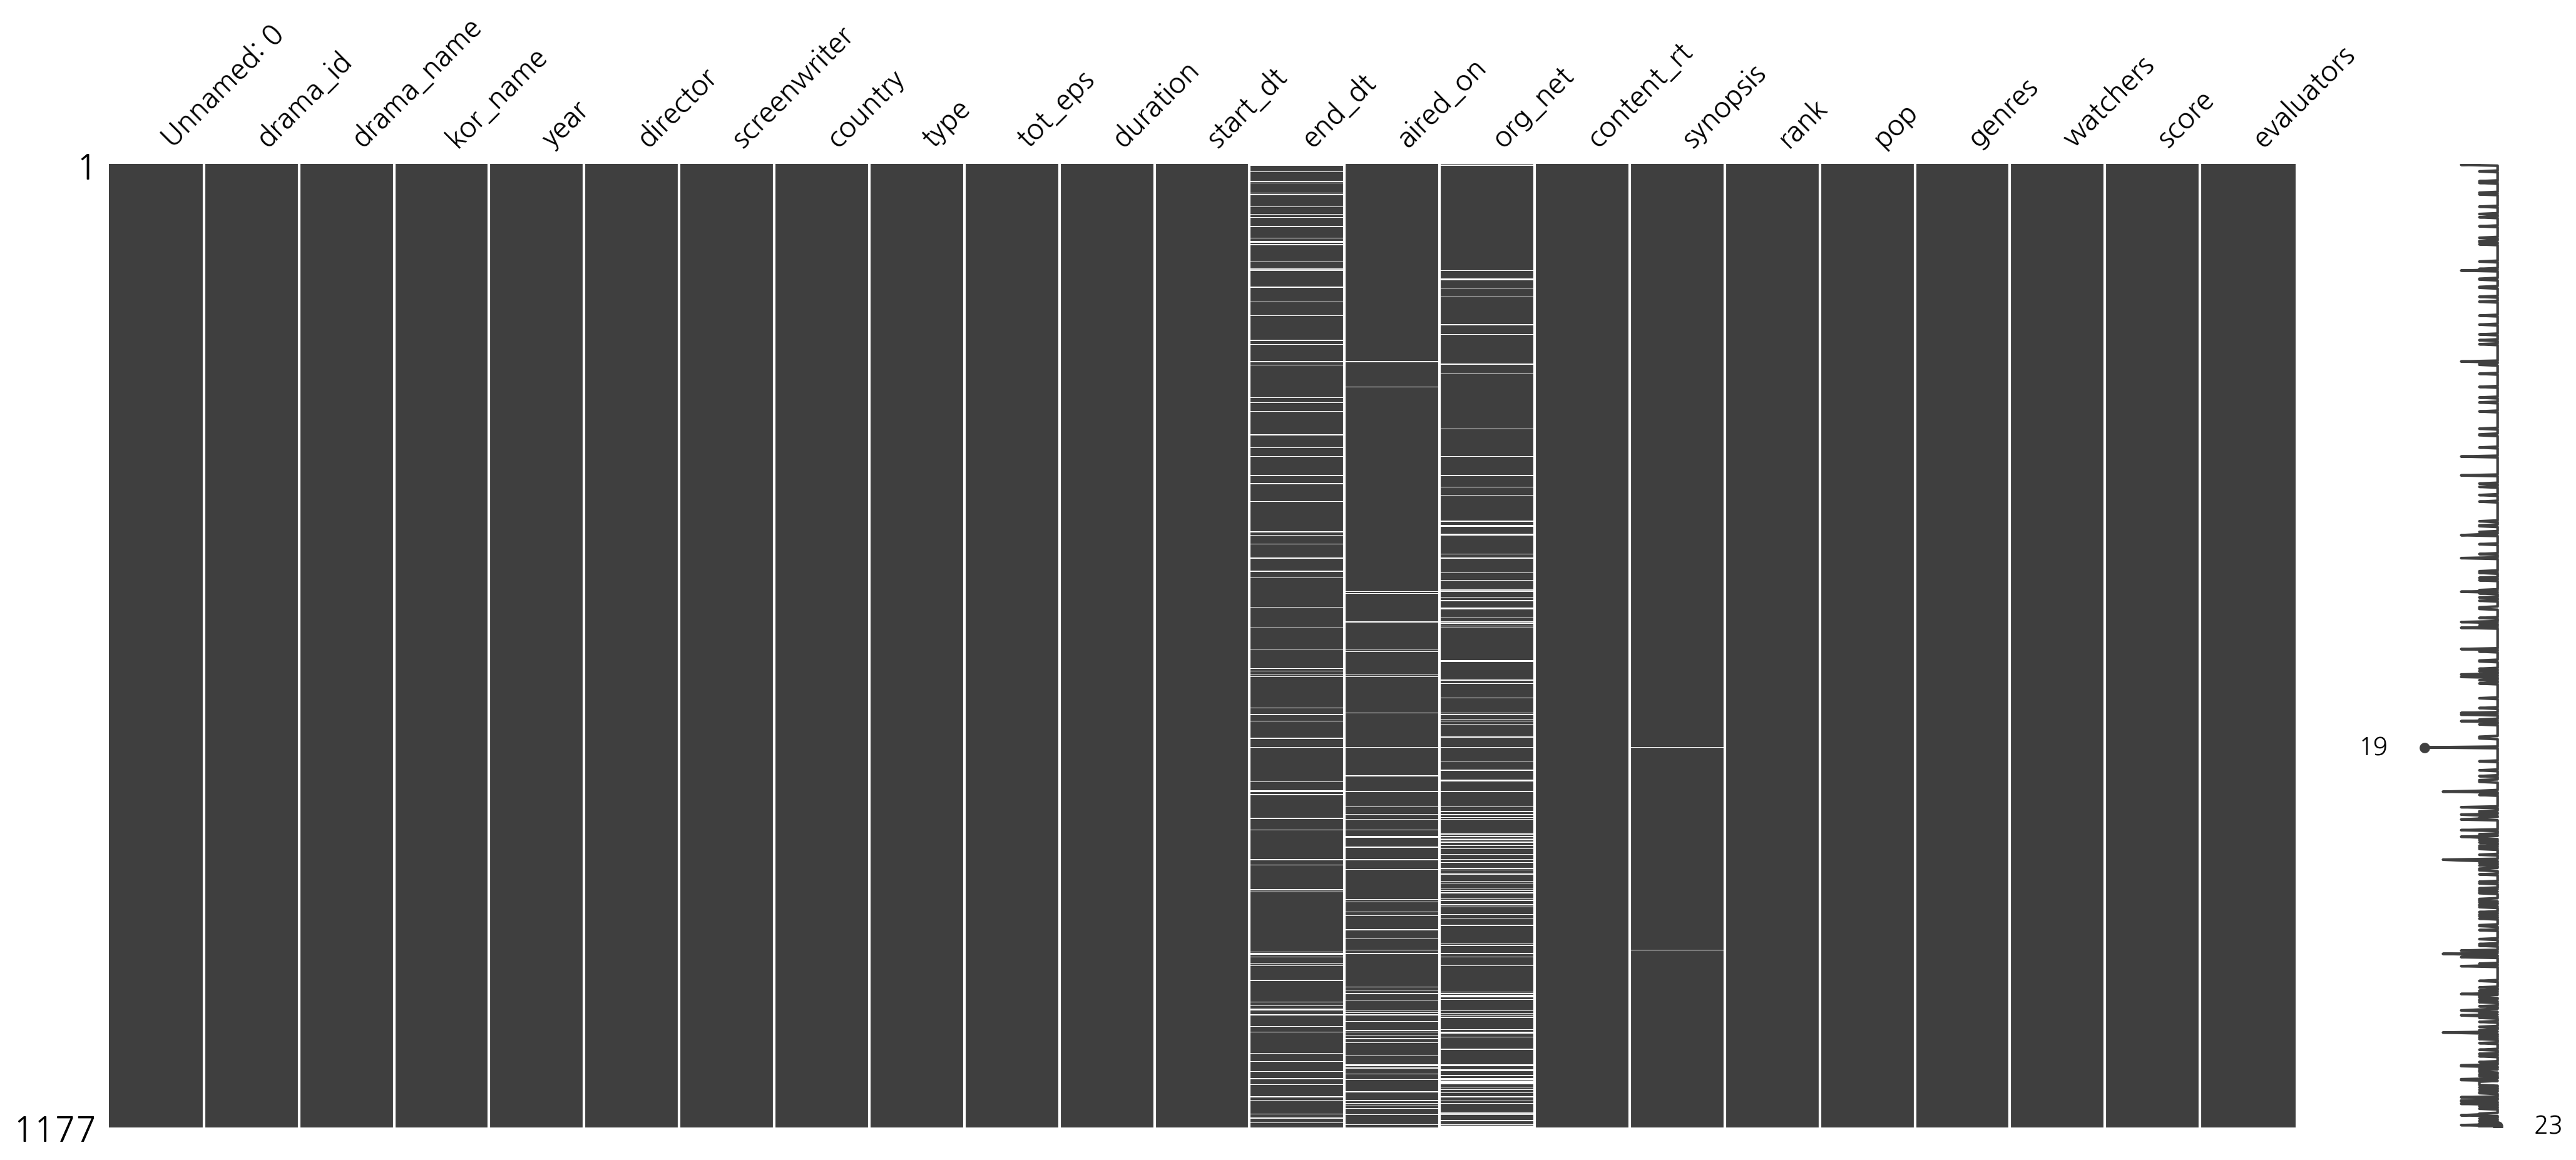

In [20]:
msno.matrix(drama_df);

In [21]:
# drama_df[drama_df['end_dt'].isnull()]

# 04. Data Visualization

In [22]:
# drop 'Unnamed: 0' column
drama_df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [23]:
# add a column to covert duration from seconds to minutes
drama_df['duration_minute'] = drama_df['duration'] / 60
# drama_df.head()

### 04-01. [ 방영기간별 시청자 수 ]

In [24]:
how_long = drama_df.drop(columns=['year', 'country', 'type', 'duration', 'aired_on', 'content_rt', 'synopsis', 'genres', 'evaluators']).copy()

In [25]:
# how_long[how_long['end_dt'].isnull()]

In [26]:
# column 'end_dt' nan값을 'start_dt'값으로 대채
for idx, row in how_long.iterrows():
    
    if pd.isnull(row['end_dt']):
        how_long.loc[how_long['end_dt'][idx]] = row['start_dt']

    else:
        continue

In [27]:
# print(type(drama_df['start_dt'][0]))

In [28]:
# import time
# def strToTime(s):
#     return time.strptime(s, "%Y-%m-%d")

# df_kdrama_02['start_dt'] = df_kdrama_02['start_dt'].apply(strToTime)Q

In [29]:
# 'start_dt' , 'end_dt' type 변경: Timestamp -> datetime
weekNumber_start = pd.to_datetime(how_long['start_dt']).dt.isocalendar()
weekNumber_end = pd.to_datetime(how_long['end_dt']).dt.isocalendar()

# extracting the year & week from the date
weekNumbers = pd.merge(weekNumber_start, weekNumber_end, left_index=True, right_index=True)
how_long.loc[:,'year_start'] = weekNumber_start.year
how_long.loc[:,'week_start'] = weekNumber_start.week
how_long.loc[:,'year_end'] = weekNumber_end.year
how_long.loc[:,'week_end'] = weekNumber_end.week
how_long.head()

,drama_id,drama_name,kor_name,director,screenwriter,tot_eps,start_dt,end_dt,org_net,rank,pop,watchers,score,duration_minute,year_start,week_start,year_end,week_end
0.0,49231,Move to Heaven,무브 투 헤븐,['Kim Sung Ho'],['Yoon Ji Ryun'],10,2021-05-14,NaN,[Netflix],11,83,75895,9.2,52.0,2021,19,<NA>,<NA>
1.0,702267,Weak Hero Class 1,약한영웅 Class 1,['You Su Min'],['You Su Min'],8,2022-11-18,NaN,NaN,15,158,52416,9.1,40.0,2022,46,<NA>,<NA>
2.0,57173,Hospital Playlist Season 2,슬기로운 의사생활++,['Shin Won Ho'],['Lee Woo Jung'],12,2021-06-17,2021-09-16,"[Netflix, tvN]",17,154,52683,9.1,100.0,2021,24,2021,37
3.0,54625,Flower of Evil,악의 꽃,"['Kim Chul Gyu','Yoon Jong Ho']",['Yoo Jung Hee'],16,2020-07-29,2020-09-23,[tvN],21,28,108058,9.1,70.0,2020,31,2020,39
4.0,36269,Hospital Playlist,슬기로운 의사 생활,['Shin Won Ho'],['Lee Woo Jung'],12,2020-03-12,2020-05-28,"[Netflix, tvN]",24,49,90332,9.1,90.0,2020,11,2020,22


In [30]:
# print(type(how_long['year_end'][2]))

In [31]:
# columns 'year_start', 'week_start', 'year_end', 'week_end': uint32 -> int64
how_long = how_long.astype({'year_start': 'int64', 'week_start': 'int64', 'year_end': 'int64', 'week_end': 'int64'})

ValueError: cannot convert NA to integer: Error while type casting for column 'year_end'

In [ ]:
# print(type(how_long['year_start'][0]))

In [ ]:
# # week difference = 'week_start' - 'week_end'
# v = int(how_long['week_start'][15] - how_long['week_end'][15])
# v

In [ ]:
# check column lengths
# len(how_long['week_start']), len( how_long['week_end'])

In [ ]:
# how_long.iloc[:11, :]

In [ ]:
# # 더 자세히 확인 할 필요는 있지만 현재로썬 에피소드 갯수가 90 이상이여도 방영을 1년 이상한 드라마는 안보임
# drama_df.loc[drama_df['tot_eps'] >= 90].sort_values(by='tot_eps', ascending=False)

In [ ]:
week_count_validated = []

for idx, row in how_long.iterrows():
    # print(f"[{idx}]: {row['kor_name']} ====================")

    # when start year of the drama is same as the end year of the drama
    if row['year_start'] == row['year_end']:
        week_count_validated.append(row['week_end'] - row['week_start'])
        # print(row['week_end'] - row['week_start'])

    # when start year of the drama is a year before the end year of the drama
    elif row['year_start'] < row['year_end']:
        week_count_validated.append((52 - row['week_start']) + row['week_end'])
        # print((52 - row['week_start']) + row['week_end'])
    
    # error with year columns
    else:
        print("Invalid date row")
        break

In [ ]:
# add column 'week_count' to dataFrame how_long
how_long['week_count'] = week_count_validated
# how_long

#### 방영 주수별 시청자 수 (Drama on-air vs Watchers)

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=how_long["week_count"], y=drama_df["watchers"], c="c", s=50)
plt.title('Drama on-air vs Watcher', fontsize=20)
plt.xlabel('number of weeks', fontsize=18)
plt.ylabel('watcher count', fontsize=18)

plt.tight_layout()
plt.show();

#### 방영 주수가 0인 드라마 시청자 수 (Week 0)

In [ ]:
week_zero = how_long.loc[how_long["week_count"] == 0]

In [ ]:
# week_zero

In [ ]:
# week_zero["watchers"]

In [ ]:
# week_zero["year_start"]

In [ ]:
week_zero_watchers = week_zero.sort_values(by='watchers', ascending=False)

In [ ]:
# week_zero_watchers.loc[week_zero_watchers['year_start'] == 2021]

In [ ]:
plt.subplots(figsize=(10, 6))

plt.scatter(x=week_zero["year_start"], y=week_zero["watchers"], c="c", s=50)
plt.title('Week 0', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Watchers', fontsize=18)

plt.tight_layout()
plt.show();

### 04-02. [에피소드 방영 시간 분포도]

In [ ]:
# check unique duration minutes
unique_durations = drama_df['duration_minute'].unique()
np.sort(unique_durations)

In [ ]:
# drama_df.loc[drama_df['duration_minute'] == 100.0]

#### 전체 드라마 에피소드 방영시간 분포도 (Drama Count Distribution per Episode Duration)

In [ ]:
plt.figure(figsize=(18, 8))

plt.hist(drama_df.loc[~np.isnan(drama_df['duration_minute']), 'duration_minute'], bins=50, edgecolor='black')
plt.title('Drama Count Distribution per Episode Duration', fontsize=25)
plt.xlabel('Duration (minutes)', fontsize=18)
plt.ylabel('Number of Dramas', fontsize=18)
plt.show();

#### 에피소드 방영시간이 15분 이하인 드라마 수 (Episode Duration Below 15 Minutes)

In [ ]:
df_minBelow_15 = drama_df['duration_minute'] <= 15

plt.figure(figsize=(18, 8))

plt.hist(drama_df.loc[df_minBelow_15, 'duration_minute'], bins=15, edgecolor='black')
plt.title('Episode Durations Below 15 Minutes', fontsize=25)
plt.xlabel('Duration (minutes)', fontsize=18)
plt.ylabel('Number of Dramas', fontsize=18)
plt.show();

#### 에피소드 방영시간이 15분 초과 30분 이하인 드라마 수 (Episode Duration Between 15 and 30 Minutes)

In [ ]:
df_min_10_30 = (drama_df['duration_minute'] > 15) & (drama_df['duration_minute'] <= 30)

plt.figure(figsize=(18, 8))

plt.hist(drama_df.loc[df_min_10_30, 'duration_minute'], bins=15, edgecolor='black')
plt.title('Episode Durations Between 15 and 30 Minutes', fontsize=25)
plt.xlabel('Duration (minutes)', fontsize=18)
plt.ylabel('Number of Dramas', fontsize=18)
plt.show();

#### 에피소드 방영시간이 30분 초과 60분 이하인 드라마 수 (Episode Duration Between 30 and 60 Minutes)

In [ ]:
df_min_30_60 = (drama_df['duration_minute'] > 30) & (drama_df['duration_minute'] <= 60)

plt.figure(figsize=(18, 8))

plt.hist(drama_df.loc[df_min_30_60, 'duration_minute'], bins=15, edgecolor='black')
plt.title('Episode Durations Between 30 and 60 Minutes', fontsize=25)
plt.xlabel('Duration (minutes)', fontsize=18)
plt.ylabel('Number of Dramas', fontsize=18)
plt.show();

#### 에피소드 방영시간이 60분 초과인 드라마 수 (Episode Duration Longer than 60 Minutes)

In [ ]:
plt.figure(figsize=(18, 8))

plt.hist(drama_df.loc[drama_df['duration_minute'] > 60, 'duration_minute'], bins=40, edgecolor='black')
plt.title('Episode Durations Longer than 60 Minutes', fontsize=25)
plt.xlabel('Duration (minutes)', fontsize=18)
plt.ylabel('Number of Dramas', fontsize=18)
plt.show();
# bar 위에 숫자 나타내기

### 04-03. [방영시간과 시청자수에 상관관계]

#### 방영시간과 시청자수에 상관관계 산점도 (Relation between Watchers and Duration)

In [ ]:
# Define marker sizes and colors based on 'watchers'
marker_sizes = (drama_df['watchers'] / 500)  # Adjust the scale factor as needed
marker_colors = np.log(drama_df['watchers'])  # Logarithmic scale for better color differentiation

# Create a scatter plot
plt.figure(figsize=(18, 8))
plt.scatter(drama_df['duration_minute'], drama_df['watchers'], c=marker_colors, s=marker_sizes, cmap='viridis', alpha=0.8)
plt.colorbar(label='Log(Watchers)')
plt.xlabel('Duration (minutes)', fontsize=18)
plt.ylabel('Watcher', fontsize=18)
plt.title('Relation between Watchers and Duration', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
# import plotly.express as px

# fig = px.scatter(drama_df, x="duration_minute", y="watchers",
# 	            size="pop",
#                 hover_name="drama_name", log_x=True, size_max=70)
# fig.show()

#### 가장 방영시간이 긴 드라마 상위 10 (Top 10 Dramas with the Longest Duration)

In [ ]:
top_10_longest_dramas = drama_df.sort_values(by='duration_minute', ascending=False).head(10)

In [ ]:
# plt.subplots(figsize=(18, 8))

# sns.barplot(x=top_10_longest_dramas['drama_name'], y=top_10_longest_dramas['duration_minute'], palette='inferno')
# plt.title("Top 10 Dramas with the Longest Duration", fontsize=20)
# plt.xlabel('Drama Title', fontsize=18)
# plt.ylabel('Duration (minutes)', fontsize=18)
# plt.xticks(rotation=45, ha='right')

# plt.show();

In [ ]:
plt.subplots(figsize=(16, 8))

sns.barplot(x=top_10_longest_dramas['duration_minute'], y=top_10_longest_dramas['drama_name'], palette='inferno', orient="h")
plt.title("Top 10 Dramas with the Longest Duration", fontsize=20)
plt.xlabel('Duration (minutes)', fontsize=18)
plt.ylabel('Drama Title', fontsize=18)

plt.show();

### 04-04. [에피소드 수와 시청자수의 상관관계]

In [ ]:
custom_colors = ["#ff6b6b", "#a2d2ff", "#72efdd"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

In [ ]:
sns.palplot(sns.color_palette(custom_colors),size=1)

In [ ]:
red_palette = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(red_palette),size=1)

#### 가장 많은 에피소드를 방영한 드라마 상위 15 (Top 15 Dramas with the Most Number of Episodes)

In [ ]:
top_15_most_episodes = drama_df.sort_values(by='tot_eps', ascending=False).head(15)

In [ ]:
plt.figure(figsize=(10, 6))

sns.catplot(x='tot_eps', y='drama_name', data=top_15_most_episodes, palette=red_palette, height=7, kind="point")
plt.xlabel('Total Episodes', fontsize=18)
plt.ylabel('Drama Title', fontsize=18)
plt.title('Top 15 Dramas with the Most Total Episodes', fontsize=20)
plt.xticks(rotation=45, ha='right')

plt.show();

#### 04-05. [ 어떤 장르가 많이 표출되는가? ]

In [ ]:
# Initialize a dictionary to count genres
count_genres = {}

# Loop through the 'genres' column
for lst in drama_df['genres'].values:

    # Check for missing values using pd.notna()
    if pd.notna(lst):
        # Split and process genres
        for genre in str(lst).replace('\xa0', ' ').split(","):
            genre = genre.strip()
            count_genres[genre] = count_genres.get(genre, 0) + 1

count_genres = dict(count_genres.items())
# count_genres

In [ ]:
count_genre = pd.DataFrame(count_genres.items(), columns=['Genres', 'Genre_Count'])

# Sort by 'Genre_Count' values in descending order
count_genre.sort_values(by='Genre_Count', ascending=False, inplace=True)
# count_genre

#### 각 장르는 얼마나 자주 사용되는가? (How Often Each Genre is Presented in Dramas?)

In [ ]:
sns.barplot(x=count_genre['Genre_Count'],
            y=count_genre['Genres'],
            palette=('tab10'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('How Often Each Genre is Presented in Dramas?', fontsize=20)
plt.xlabel('Count (Genre)', fontsize=15)
plt.ylabel('Genres', fontsize=15)
plt.show();

####  자주 사용되는 장르 상위 10 (The Most Frequently Used Genre Top 10)

In [ ]:
top_genres = count_genre.loc[count_genre["Genre_Count"] >= 100]

In [ ]:
sns.barplot(x=top_genres['Genre_Count'],
            y=top_genres['Genres'],
            palette=('tab10'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('The Most Frequently Used Genre Top 10', fontsize=20)
plt.xlabel('Count (Genre)', fontsize=15)
plt.ylabel('Genres', fontsize=15)
plt.show();